# PyTesseract

Pytesseract is an optical character recognition (OCR) tool for Python. It can be used to recognize text in images, such as scanned documents or photos. It is based on the Tesseract OCR engine, which is one of the most accurate and widely-used OCR engines in the world. Pytesseract is a wrapper for Tesseract, which allows it to be used in a Python environment. It is an open-source tool, which means it is freely available for anyone to use.

Pytesseract is able to recognize the difference between text and tables in images. It uses advanced algorithms to identify patterns in the pixels of the image, and can differentiate between different types of text, such as regular text, table data, and even text that is part of a diagram or chart.

Pytesseract should still be able to detect text in images even if the lines are crooked. It uses advanced algorithms to identify patterns in the pixels of the image, and is able to recognize text regardless of its orientation or alignment.

In [11]:
import pytesseract
from PIL import Image

## Detect Text from a perfect suited image

In [17]:
# load image I've found at google
# http://img.picturequotes.com/2/663/662503/tough-cookie-quote-3-picture-quote-1.jpg
image = Image.open('./img1.jpeg')

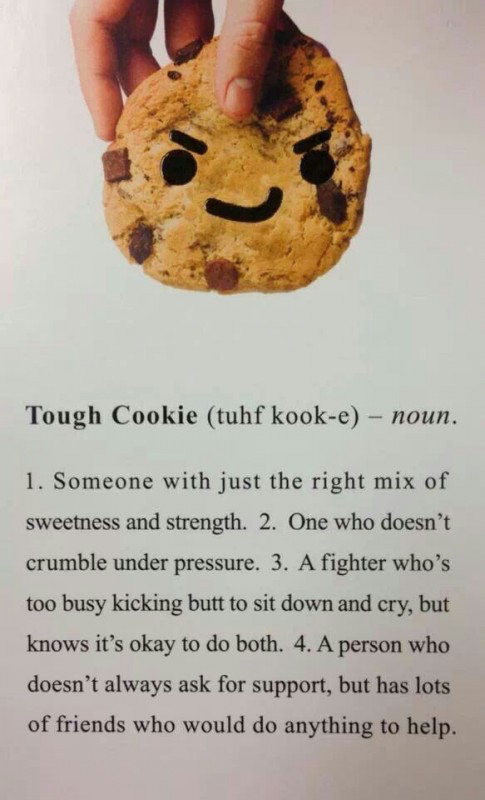

In [18]:
image

In [19]:
text = pytesseract.image_to_string(image)

In [20]:
text

'Tough Cookie (tuhf kook-e) — noun.\n\n1. Someone with just the right mix of\nsweetness and strength. 2. One who doesn’t\ncrumble under pressure. 3. A fighter who’s\ntoo busy kicking butt to sit down and cry, but\nknows it’s okay to do both. 4. A person who\ndoesn’t always ask for support, but has lots\nof friends who would do anything to help.\n'

## Detect Text from a more realistic szenario

### Version 1 - Using the Raw image

In [21]:
# load image I've found at google
# https://i.pinimg.com/originals/a8/2d/7c/a82d7c895657ca7e3e76ced267ac78d3.jpg
image = Image.open('./img2.jpeg')

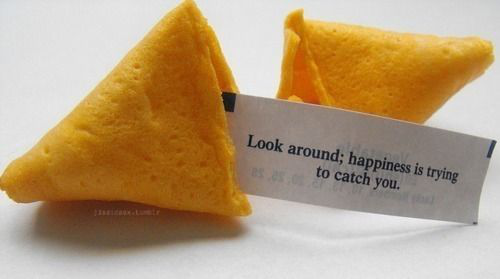

In [22]:
image

In [14]:
text = pytesseract.image_to_string(image)

In [15]:
text

''

**This is a bad performance!**

Let's try to help tesseract a bit and crop the image first

### Version 2 - Crop the image

In [23]:
image = Image.open('./img2_cropped.png')

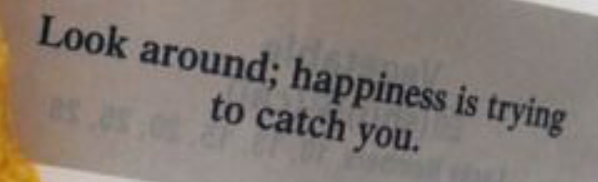

In [24]:
image

In [29]:
text = pytesseract.image_to_string(image)

In [30]:
text

''

Lol - still super bad! Let's help pytesseract a little bit more and pre-process the image to remove any background noise or clutter that may interfere with the recognition process.

### Version 3 - play with some preprocessing

In [41]:
# Since I was doing try and error, not every import will be used.
# but I'll keep them here for remembering them when I ever read that notebook again.
from PIL import Image, ImageFilter, ImageEnhance, ImageDraw
import math

In [55]:
image = Image.open('./img2_cropped.png')

# increase contrast
contrast = ImageEnhance.Contrast(image)
image = contrast.enhance(1.8)

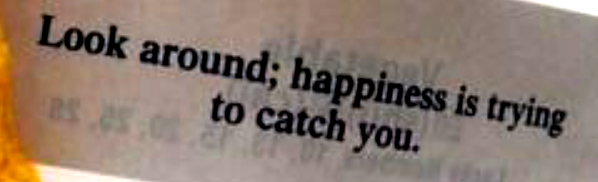

In [56]:
image

In [57]:
text = pytesseract.image_to_string(image)

In [58]:
text

'2 aro\n\nwad; ate eS ying\n\n0 catch you\n'

Hm ... it's still a bad performance, even if it's much clearer now.
Let's try to adjust the text alignment.

### Version 4 - try to realign the text

In [270]:
image = Image.open('./img2_cropped.png')

image = image.rotate(6.9)

In [271]:
contrast = ImageEnhance.Contrast(image)
image = contrast.enhance(1.6)

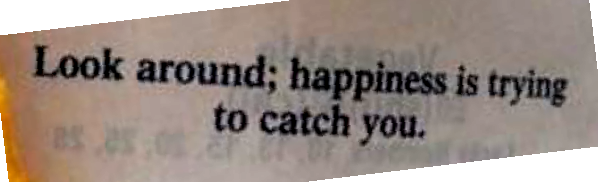

In [272]:
image

In [273]:
text = pytesseract.image_to_string(image)

In [274]:
text

'ee\nLook around; happiness is trying\n| to catch you.\n'

Hmm ... Still not perfect. But good enough for now - I will finish today.